# Tutorial 3: Analysing alignment(s)

In [1]:
import requests
import re
import logomaker as lmaker
import numpy as np
import matplotlib.pyplot as plt

### Functions to download, read and transform alignment files

In [2]:
def download_alignment_files(uniprot_id):
    url="https://pycom.brunel.ac.uk/alignments/"
    file_name=uniprot_id+".aln"
    
    web_url=url+file_name
    
    try:
        response = requests.get(web_url, stream=True)

        # Check if the request was successful (HTTP status code 200)
        response.raise_for_status()
        if response.status_code == 200:
        # Open the file in binary write mode and save the content
            with open(file_name, 'wb') as file:
                for chunk in response.iter_content(chunk_size=8192):
                    file.write(chunk)

            print(f"File downloaded successfully and saved as '{file_name}'.")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading the file: {e}")
        
def convert_to_fasta(aln_file_in,fasta_file_out):
    file_data = open(aln_file_in,'r')
    count=0
    out=""
    for line in file_data:
        out+=">SEQ_%d\n"%(count)
        out+="%s"%(line)
        count+=1
    f=open(fasta_file_out,'w')
    f.write(out)
    f.close()
    
def read_alignment_file(file_path):
    with open(file_path, "r") as file:
        content = file.read()
        sequences = re.findall(r'[A-Z\-]+', content)
    return sequences

### Download the alignment file

In [3]:
uniprot_id="P0C5H4"
# download the alignment file from PyCoM (pycom.brunel.ac.uk) server
download_alignment_files(uniprot_id)

File downloaded successfully and saved as 'P0C5H4.aln'.


### Read the alignment file

In [4]:
# get the sequences from the alignment file
alignment_file_path = uniprot_id+".aln"
sequences = read_alignment_file(alignment_file_path)

### Convert the sequence to FASTA format

In [5]:
# Generate sequence alignment compatible with https://alignmentviewer.org/ format
# you can upload the fasta file to https://alignmentviewer.org/ for analysis of the alignment
convert_to_fasta("P0C5H4.aln","P0C5H4.fasta")

In [6]:
# number of sequences in the alignment file
len(sequences)

23

### Transfrom sequence list to frequency matrix

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
pos,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,2,0,19,0,0,0,0,2,0,0,0,0,0
1,0,0,0,4,0,0,0,1,17,0,0,0,0,1,0,0,0,0,0,0
2,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,2,0,2,0,0,17,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,12,0,0,0,0,3,2,1,5,0,0,0
5,0,0,0,0,0,0,0,1,0,16,0,0,4,1,0,0,0,1,0,0
6,0,0,0,0,1,1,0,7,0,5,0,0,0,0,0,0,0,9,0,0
7,0,0,1,0,0,0,0,0,1,0,0,0,20,0,1,0,0,0,0,0
8,0,0,0,0,6,0,0,5,0,6,0,0,5,0,0,0,0,0,1,0


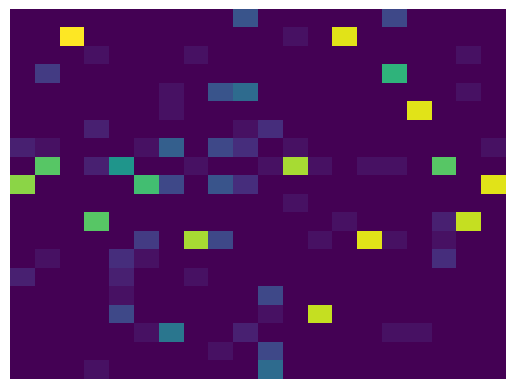

In [14]:
# convert the sequence list to a pandas dataframe with count's of each aminoacid at each position
df_sequence_count_matrix=lmaker.alignment_to_matrix(sequences)

plt.axis('off')
plt.imshow(df_sequence_count_matrix.T, aspect='auto')

df_sequence_count_matrix

### Plot the Logo images

(-1.0, 20.0)

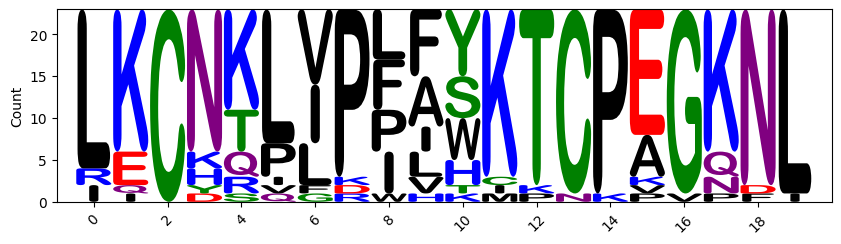

In [8]:
# Based on tutorial from logo https://logomaker.readthedocs.io/en/latest/examples.html#ww-domain-information-logo

seq_logo=lmaker.Logo(df_sequence_count_matrix,
            color_scheme="chemistry",
            font_name='Arial Rounded MT Bold')
seq_logo.style_xticks(anchor=0, spacing=2, rotation=45)
#seq_logo.highlight_position(p=4, color='gold', alpha=.5)
#seq_logo.highlight_position(p=26, color='gold', alpha=.5)

# style using Axes methods
seq_logo.ax.set_ylabel('Count')
seq_logo.ax.set_xlim([-1, len(df_sequence_count_matrix)])

### Matrix transformation examples

In [9]:
# convert frequency matrix to probability matrix
df_probability_matrix=lmaker.transform_matrix(df_sequence_count_matrix,normalize_values=True)
# convert probability matrix to information matrix
df_information_matrix=lmaker.transform_matrix(df_probability_matrix,from_type="probability",to_type="information",normalize_values=False)

### Some more Logo images

In [10]:
df_information_matrix

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
pos,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.302734,0.000000,2.875969,0.000000,0.000000,0.000000,0.000000,0.302734,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.550845,0.000000,0.000000,0.000000,0.137711,2.341092,0.000000,0.000000,0.000000,0.000000,0.137711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,4.321928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.130150,0.000000,0.000000,0.000000,0.260300,0.000000,0.260300,0.000000,0.000000,2.212548,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.130150
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.287255,0.000000,0.000000,0.000000,0.000000,0.321814,0.214543,0.107271,0.536356,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.127339,0.000000,2.037427,0.000000,0.000000,0.509357,0.127339,0.000000,0.000000,0.000000,0.127339,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.104259,0.104259,0.000000,0.729811,0.000000,0.521294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.938329,0.000000,0.000000
7,0.000000,0.000000,0.154633,0.000000,0.000000,0.000000,0.000000,0.000000,0.154633,0.000000,0.000000,0.000000,3.092665,0.000000,0.154633,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.562585,0.000000,0.000000,0.468821,0.000000,0.562585,0.000000,0.000000,0.468821,0.000000,0.000000,0.000000,0.000000,0.000000,0.093764,0.000000


(-1.0, 20.0)

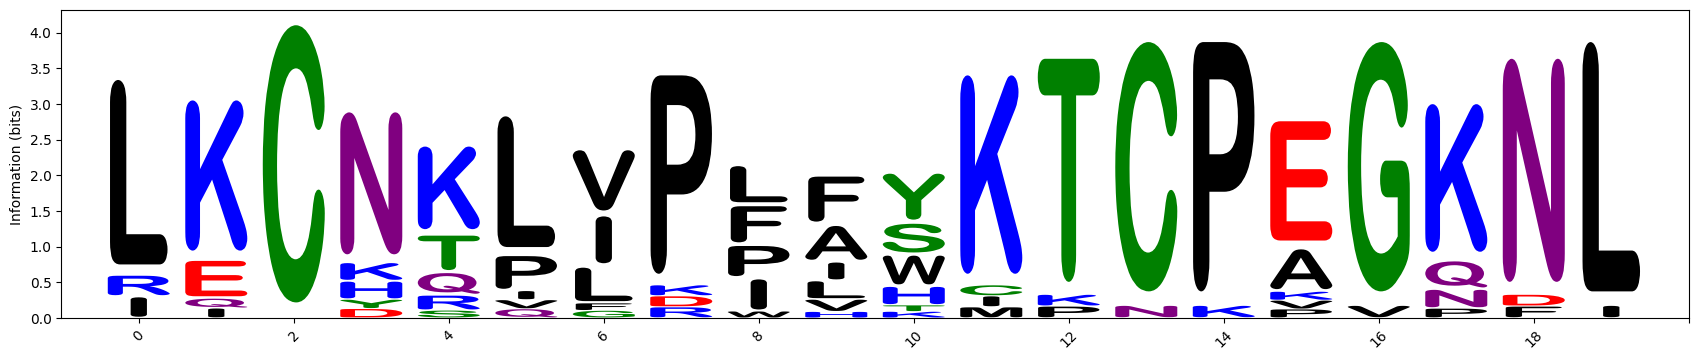

In [11]:
seq_logo=lmaker.Logo(df_information_matrix,vpad=0.1,width=0.8,figsize=(21,4),color_scheme="chemistry",font_name='Arial Rounded MT Bold')
seq_logo.style_xticks(anchor=0, spacing=2, rotation=45)
#seq_logo.highlight_position(p=4, color='gold', alpha=.5)
#seq_logo.highlight_position(p=26, color='gold', alpha=.5)

# style using Axes methods
seq_logo.ax.set_ylabel('Information (bits)')
seq_logo.ax.set_xticks(np.arange(0,len(df_sequence_count_matrix)+4,2))
seq_logo.ax.set_xlim([-1, len(df_sequence_count_matrix)])